In [115]:
import pandas as pd
import numpy as np 


In [116]:
cd 01

[Errno 2] No such file or directory: '01'
/Users/yasharthkesarwani/Documents/Dl/01


In [117]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [119]:
 df.duplicated().sum()

0

In [120]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [121]:
df.Geography.value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [122]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [123]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [124]:
df=pd.get_dummies(df,columns=["Geography","Gender"],drop_first=True)

In [125]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,0,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,1,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,0,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,0,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,1,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,1,True,False,True


In [126]:
X= df.drop(columns=['Exited'])
y=df['Exited']
from sklearn.model_selection import train_test_split
X_train ,  X_test , y_train , y_test = train_test_split( X , y ,test_size=0.2,random_state=1)

In [127]:
X_train.shape

(8000, 11)

In [128]:
from sklearn.preprocessing import StandardScaler
scaler =StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [129]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [130]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [131]:
model= Sequential()
model.add(Dense(11,activation='relu',input_dim = 11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [132]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [133]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [134]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6859 - loss: 0.6418 - val_accuracy: 0.7975 - val_loss: 0.5123
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7975 - loss: 0.4969 - val_accuracy: 0.8069 - val_loss: 0.4432
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8073 - loss: 0.4389 - val_accuracy: 0.8087 - val_loss: 0.4257
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8205 - loss: 0.4183 - val_accuracy: 0.8144 - val_loss: 0.4130
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8364 - loss: 0.3970 - val_accuracy: 0.8231 - val_loss: 0.3997
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8369 - loss: 0.3881 - val_accuracy: 0.8331 - val_loss: 0.3826
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8509 - loss: 0.3656 - val_accuracy: 0.8438 - val_loss: 0.3698
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8607 - loss: 0.3625 - val_accu

In [135]:
model.layers[0].get_weights()

[array([[-0.22030398, -0.24359964,  0.31754854,  0.37021872, -0.13604546,
          0.38921311,  0.30835995,  0.05393909,  0.22080366, -0.09078784,
         -0.347703  ],
        [ 0.6088534 ,  0.27631548,  0.6420176 , -0.4997062 ,  0.09096732,
          0.04123948,  0.40955213, -0.7811676 , -0.53876245,  0.46404517,
         -0.06625866],
        [-0.18874736, -0.5281854 , -0.20647065,  0.39655545,  0.14453244,
         -0.50873333,  0.84314847, -0.08451498, -0.5168001 ,  0.37539607,
         -0.35037312],
        [-0.18871987,  0.2367355 ,  0.4763467 , -0.71899253,  0.14804937,
          0.34583738,  0.01940107,  0.06035123,  0.01648788, -0.130453  ,
         -0.48000792],
        [ 0.10930482,  0.7469244 ,  0.56973743,  0.08382332,  1.242325  ,
          0.14275052, -0.28660166,  0.05825993,  0.9822054 ,  0.5249115 ,
         -0.54695314],
        [ 0.11616856,  0.1677951 ,  0.2472911 , -0.16158931, -0.08957401,
          0.5848213 , -0.26497325,  0.01818913, -0.27948698,  0.0243976

In [136]:
model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[0.03159137],
       [0.09652875],
       [0.05002947],
       ...,
       [0.01440287],
       [0.06922686],
       [0.29675847]], dtype=float32)

In [137]:
y_log= model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [138]:
y_pred = np.where(y_log>0.5,1,0)

In [139]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.86

In [140]:
import matplotlib.pyplot as plt
history.history

{'accuracy': [0.7592187523841858,
  0.8001562356948853,
  0.8120312690734863,
  0.8206250071525574,
  0.8307812213897705,
  0.8399999737739563,
  0.8475000262260437,
  0.8517187237739563,
  0.8565624952316284,
  0.856249988079071,
  0.856249988079071,
  0.8598437309265137,
  0.8606250286102295,
  0.8609374761581421,
  0.859375,
  0.8618749976158142,
  0.8617187738418579,
  0.8643749952316284,
  0.8629687428474426,
  0.8607812523841858,
  0.8614062666893005,
  0.8629687428474426,
  0.8634374737739563,
  0.8643749952316284,
  0.8639062643051147,
  0.8639062643051147,
  0.8648437261581421,
  0.8646875023841858,
  0.8653125166893005,
  0.8653125166893005,
  0.8628125190734863,
  0.8654687404632568,
  0.8628125190734863,
  0.8651562333106995,
  0.8642187714576721,
  0.8657812476158142,
  0.8643749952316284,
  0.8635937571525574,
  0.8673437237739563,
  0.8653125166893005,
  0.8654687404632568,
  0.8656250238418579,
  0.8634374737739563,
  0.8660937547683716,
  0.8671875,
  0.865000009536743

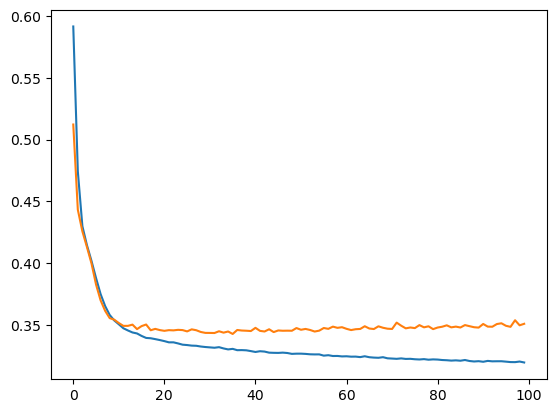

In [143]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

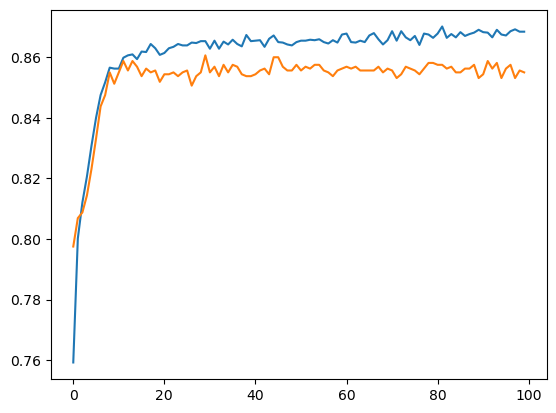

In [145]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])